# Lista de Exercícios 2 - Elementos de Processamento de Imagens

Prof. Gilson Antonio Giraldi \
Aluno Lorran de Araújo Durães Soares \
Questão 3

3 - Escolha uma base de imagens 𝐷 e converta as imagens para escala de cinza. Separe 𝐷 em dois subconjuntos disjuntos 𝐷𝑡𝑟 e 𝐷𝑡𝑒. 

(a) Calcule o ‘PCA para problemas com pequeno número de amostras’ sobre 𝐷𝑡𝑟. 

(b) Estude o espectro da matriz 𝑅=(1/𝑁)𝑋^TX para realizar a redução de dimensionalidade. 

(c) Aplique o PCA sobre 𝐷𝑡𝑒 e compare a eficiência de compressão com a DCT.

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.model_selection import train_test_split
np.random.seed(42)
random.seed(42)
from funcoes import PCAAnalysis
from scipy.fftpack import dct, idct

In [2]:
image_dir = './fei-database/'
images = []
image_paths = []

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)
    img = img.resize((260, 360))  
    img_array = np.array(img)
    images.append(img_array)
    image_paths.append(img_path)  

images = np.array(images)
images.shape

(400, 360, 260, 3)

In [3]:
def pre_processamento(images):
    # deixa em tom de cinza
    images_preproces = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

    # vetoriza
    images_preproces = images_preproces.reshape(images.shape[0], -1)

    # # normaliza
    # images_preproces = images_preproces / np.linalg.norm(images_preproces, axis=0)

    return images_preproces

In [4]:
images_preproces = pre_processamento(images)
images_preproces.shape

(400, 93600)

In [5]:
data_train, data_test = train_test_split(images_preproces, test_size=0.2, shuffle=True)

In [6]:
pca_small_size = PCAAnalysis(data_train)

In [7]:
pca_small_size.fit();

In [8]:
# pca_small_size.plot_explained_variance()

In [9]:
# pca_small_size.truncate();

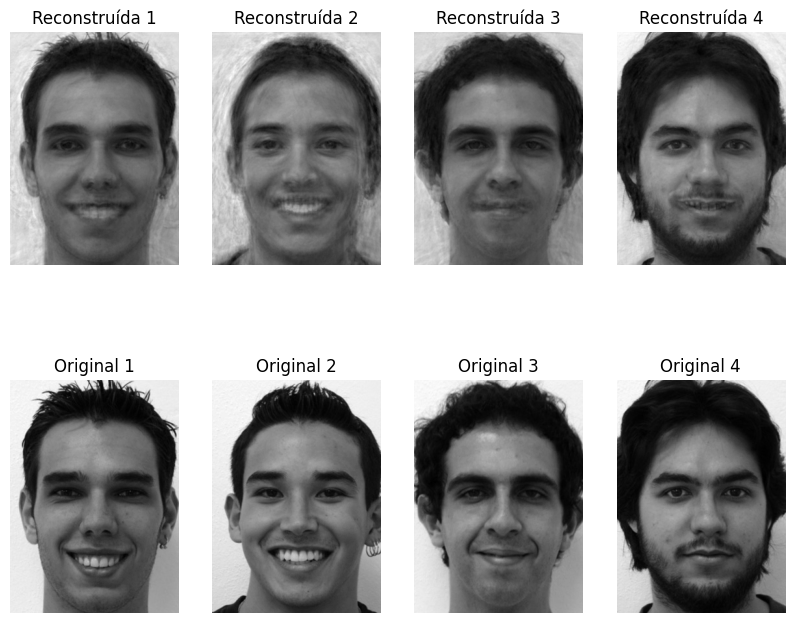

(80, 93600)

In [10]:
data_test_transformed = pca_small_size.transform(data_test)

data_test_reconstructed = pca_small_size.reconstrucion_images(data=data_test, data_transf=data_test_transformed)

data_test_reconstructed.shape

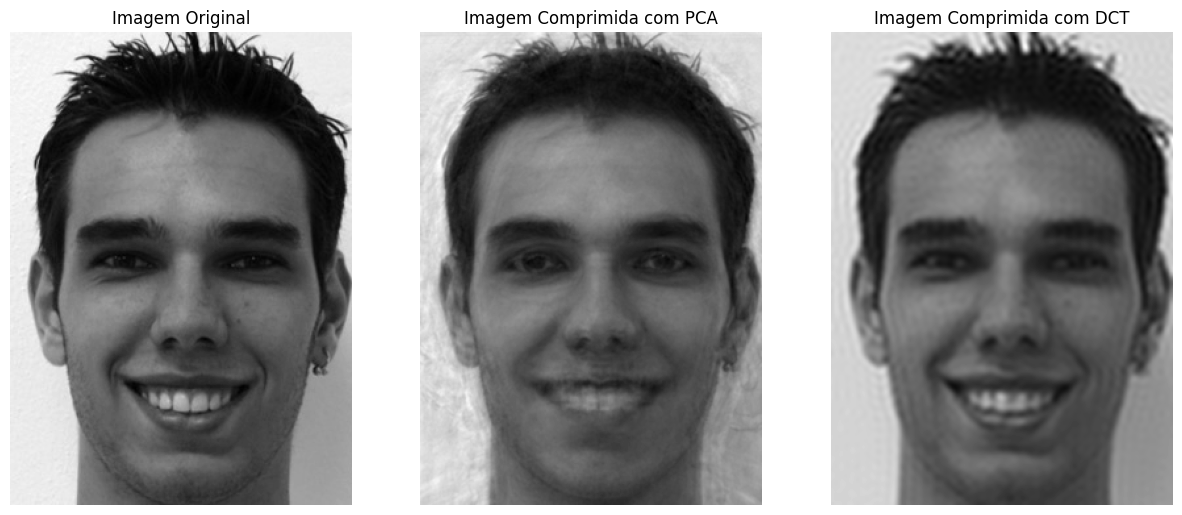

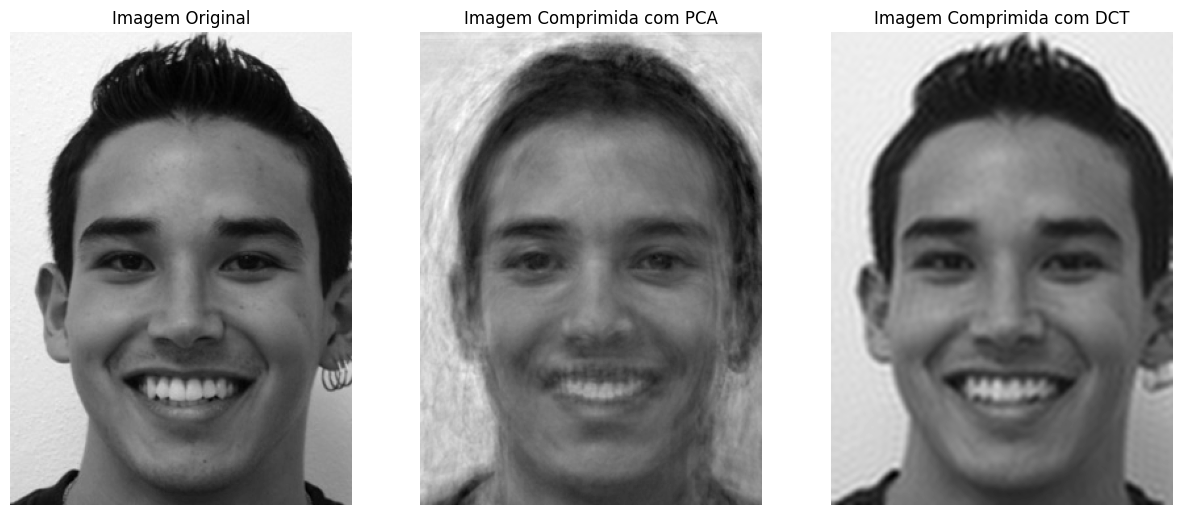

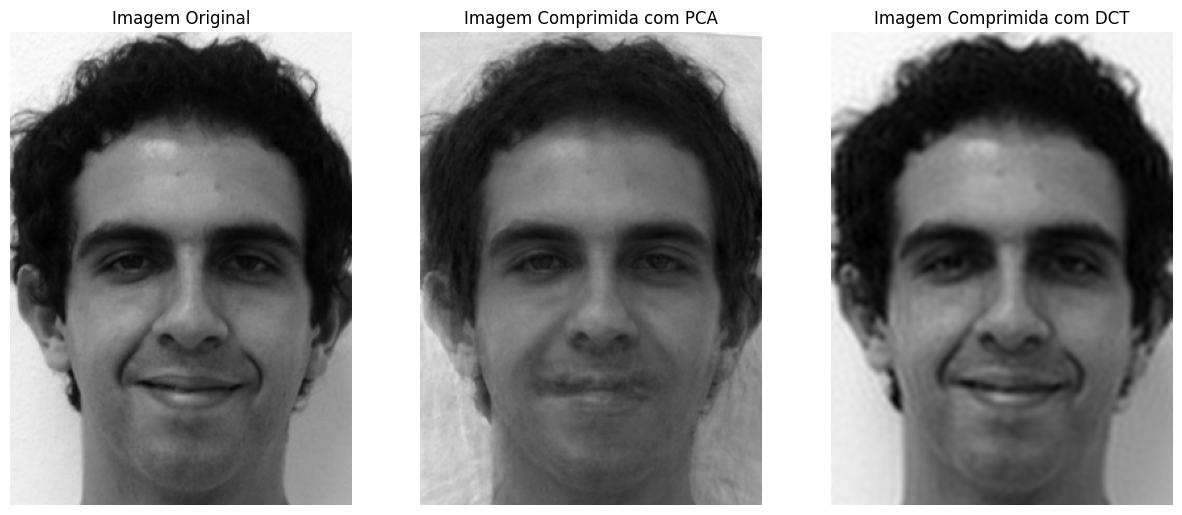

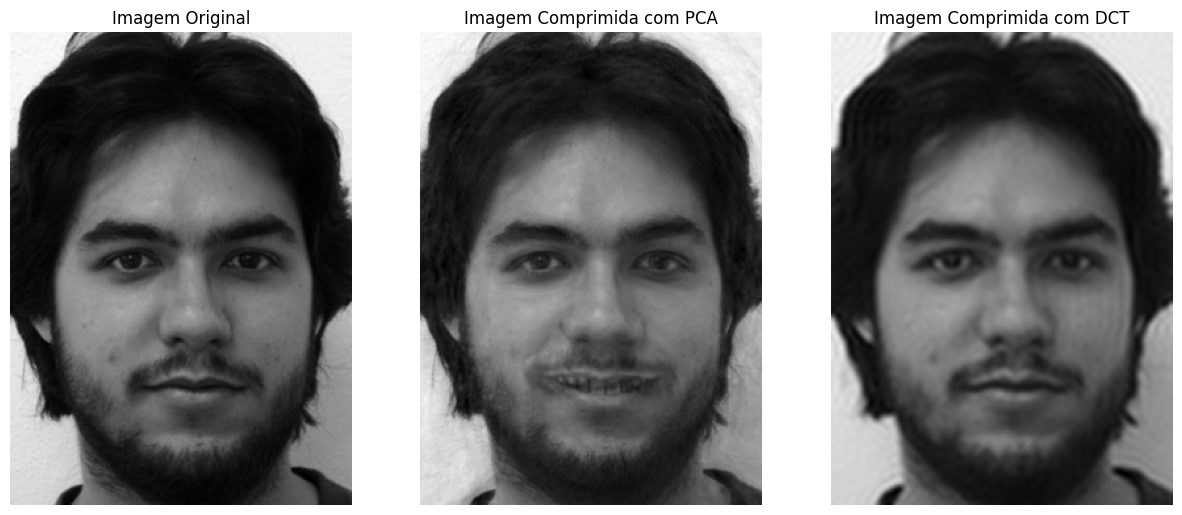

In [11]:
# Função para calcular a DCT em 2D
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

# Função para calcular a IDCT em 2D
def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

quant_images = 4

for i in range(quant_images):
    
    image = data_test[20*i].reshape(360,260)

    # Aplicar a DCT em toda a imagem
    dct_transformed = dct2(image)

    # Definir a taxa de compressão: zero os coeficientes de alta frequência
    compression_rate = 0.2475
    rows, cols = dct_transformed.shape
    dct_compressed = np.zeros_like(dct_transformed)
    dct_compressed[:int(rows * compression_rate), :int(cols * compression_rate)] = dct_transformed[:int(rows * compression_rate), :int(cols * compression_rate)]

    # Reconstruir a imagem a partir dos coeficientes comprimidos usando IDCT
    reconstructed_image = idct2(dct_compressed)

    # Exibir as imagens original e comprimida
    plt.figure(figsize=(15, 30))

    plt.subplot(4, 3, 3*i + 1)
    plt.imshow(image, cmap='gray')
    plt.title("Imagem Original")
    plt.axis("off")

    plt.subplot(4, 3, 3*i + 2)
    plt.imshow(data_test_reconstructed[20*i].reshape(360,260), cmap='gray')
    plt.title("Imagem Comprimida com PCA")
    plt.axis("off")

    plt.subplot(4, 3, 3*i + 3)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title("Imagem Comprimida com DCT")
    plt.axis("off")
    
plt.show()